In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Chocolate/chocolate.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df.tail()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25
2529,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50


In [ ]:
df.shape

(2530, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [ ]:
df.describe()

,ref,review_date,rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,3.196344
std,757.648556,3.968267,0.445321
min,5.000000,2006.000000,1.000000
25%,802.000000,2012.000000,3.000000
50%,1454.000000,2015.000000,3.250000
75%,2079.000000,2018.000000,3.500000
max,2712.000000,2021.000000,4.000000


In [ ]:
df.nunique()

ref                                  630
company_manufacturer                 580
company_location                      67
review_date                           16
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1605
cocoa_percent                         46
ingredients                           21
most_memorable_characteristics      2487
rating                                12
dtype: int64

In [ ]:
df.isnull().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [2]:
import plotly.express as px

# Scatter plot using Plotly
fig = px.scatter(df, x='cocoa_percent', y='rating', color='company_manufacturer', size='rating',
                 title='Chocolate Rating vs Cocoa Percent',
                 labels={'cocoa_percent': 'Cocoa Percent', 'rating': 'Rating'})

# Show the plot
fig.show()


NameError: name 'df' is not defined

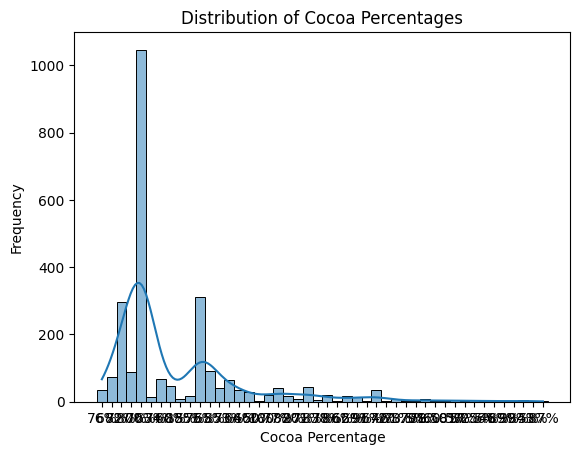

In [ ]:
#2.What is the distribution of cocoa percentages in the dataset?
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.histplot(df['cocoa_percent'], bins=20, kde=True)
plt.xlabel('Cocoa Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Cocoa Percentages')
plt.show()


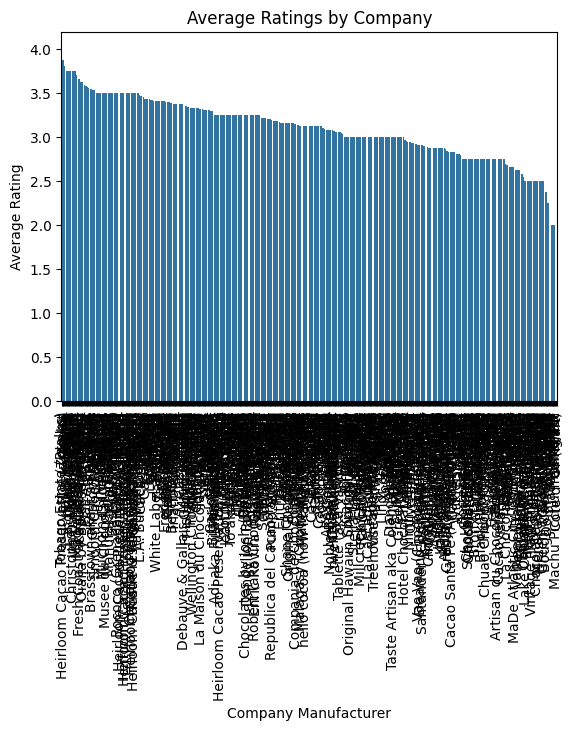

In [ ]:
#3.Which companies have the highest average ratings?
import seaborn as sns

# Assuming your DataFrame is named 'df'
average_ratings_by_company = df.groupby('company_manufacturer')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_ratings_by_company.index, y=average_ratings_by_company.values)
plt.xticks(rotation=90)
plt.xlabel('Company Manufacturer')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Company')
plt.show()


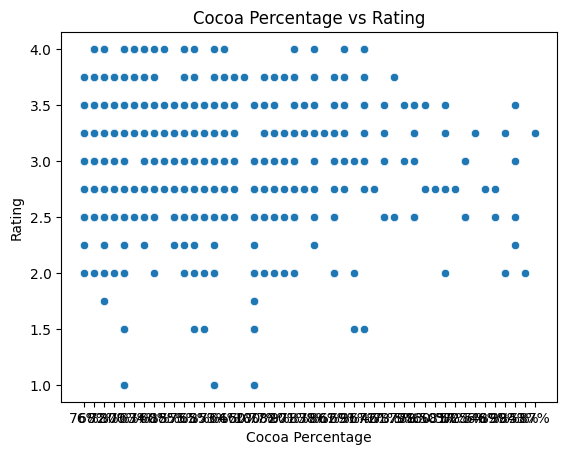

In [ ]:
#4.How does the cocoa percentage correlate with the rating?
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.scatterplot(x='cocoa_percent', y='rating', data=df)
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('Cocoa Percentage vs Rating')
plt.show()


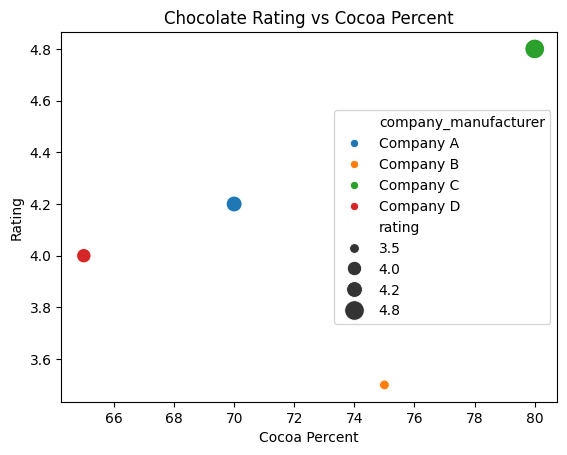

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'company_manufacturer': ['Company A', 'Company B', 'Company C', 'Company D'],
    'rating': [4.2, 3.5, 4.8, 4.0],
    'cocoa_percent': [70, 75, 80, 65]
}

# Scatter plot using Seaborn
sns.scatterplot(x='cocoa_percent', y='rating', data=df, hue='company_manufacturer', size='rating', sizes=(50, 200))

# Set plot labels and title
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.title('Chocolate Rating vs Cocoa Percent')

# Show the plot
plt.show()


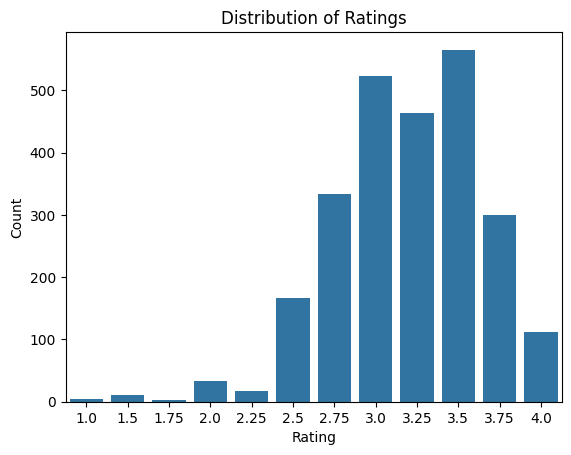

In [ ]:
#7.What is the distribution of ratings in the dataset?
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


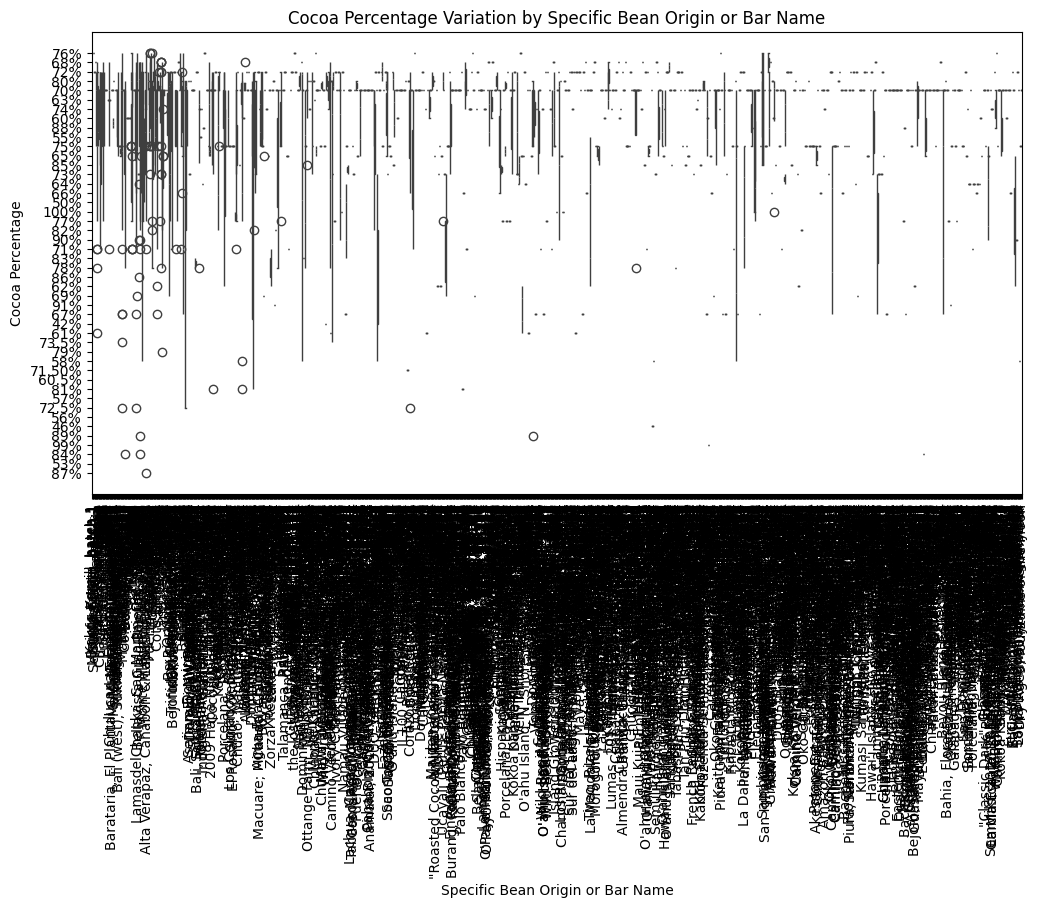

In [ ]:
#8.How does the cocoa percentage vary for different specific bean origins or bar names?
import seaborn as sns

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 6))
sns.boxplot(x='specific_bean_origin_or_bar_name', y='cocoa_percent', data=df)
plt.xticks(rotation=90)
plt.xlabel('Specific Bean Origin or Bar Name')
plt.ylabel('Cocoa Percentage')
plt.title('Cocoa Percentage Variation by Specific Bean Origin or Bar Name')
plt.show()


In [ ]:
#9.How many unique countries of bean origin are there in the dataset?
unique_countries = df['country_of_bean_origin'].nunique()
print(f'There are {unique_countries} unique countries of bean origin in the dataset.')


There are 62 unique countries of bean origin in the dataset.


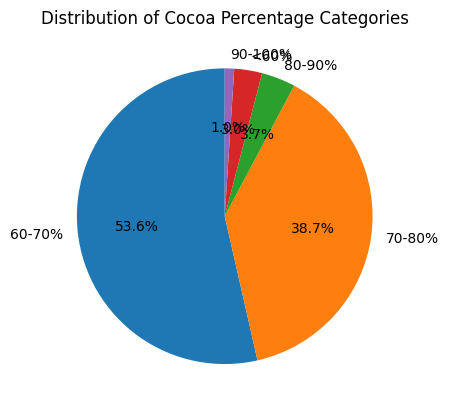

In [ ]:
#10.Pie chart for the percentage of cocoa percentage categories
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Convert 'cocoa_percent' to numeric in case it's not already
df['cocoa_percent'] = pd.to_numeric(df['cocoa_percent'].str.rstrip('%'), errors='coerce')

# Create bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['<60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Cut the data into bins
cocoa_percentage_bins = pd.cut(df['cocoa_percent'], bins=bins, labels=labels)
cocoa_percentage_distribution = cocoa_percentage_bins.value_counts()

# Plot the pie chart
plt.pie(cocoa_percentage_distribution, labels=cocoa_percentage_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cocoa Percentage Categories')
plt.show()


In [8]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'company_manufacturer': ['Company A', 'Company B', 'Company C', 'Company D'],
    'rating': [4.2, 3.5, 4.8, 4.0],
    'cocoa_percent': [70, 75, 80, 65]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Scatter plot using Plotly Express
fig = px.scatter(df, x='cocoa_percent', y='rating', color='company_manufacturer',
                 title='Chocolate Rating vs Cocoa Percent',
                 labels={'cocoa_percent': 'Cocoa Percent', 'rating': 'Rating'})

# Show the plot
fig.show()
